## Assignment 8

- ### Name: Kunal Kurve
- ### PRN: 240340128012
- ### Date: 16/06/2024

1. Download the file research-papers.csv from the link below:
https://mitu.co.in/dataset
This file contains the collection research papers received in different categories.
Perform the following operations on it:
- Read the file
- Seperate input (summary) and output data (primary category)
- Explore the output data
- Prepare and vectorize the data
- Cross validate the data
- Build the KNN model for classification with neighbors = 6
- Evaluate the performance of algorithm



### 1. Read the file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("NLP and CV/research-papers.csv")
df

,Unnamed: 0,id,Title,Summary,Author,Link,Publish Date,Update Date,Primary Category,Category
0,0,cs/9308101v1,Dynamic Backtracking,Because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
1,1,cs/9308102v1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
2,2,cs/9309101v1,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI']
3,3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
4,4,cs/9311102v1,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
...,...,...,...,...,...,...,...,...,...,...
53469,53469,math/0603084v1,Advances on nonparametric regression for funct...,We consider the problem of predicting a real r...,Frédéric Ferraty,http://arxiv.org/pdf/math/0603084v1,2006-03-03T13:25:42Z,2006-03-03T13:25:42Z,math.ST,"['math.ST', 'stat.TH']"
53470,53470,math/0603123v1,Ranking and empirical minimization of U-statis...,"The problem of ranking/ordering instances, ins...",Stéphan Clémençon,http://arxiv.org/pdf/math/0603123v1,2006-03-05T17:10:54Z,2006-03-05T17:10:54Z,math.ST,"['math.ST', 'stat.TH', '68Q32, 60G99, 62G99, 6..."
53471,53471,math/0603130v1,Nonparametric methods for inference in the pre...,"We suggest two nonparametric approaches, based...",Peter Hall,http://arxiv.org/pdf/math/0603130v1,2006-03-06T07:31:27Z,2006-03-06T07:31:27Z,math.ST,"['math.ST', 'stat.TH', '62G08 (Primary) 62G20 ..."
53472,53472,math/0603132v1,Functional linear regression analysis for long...,We propose nonparametric methods for functiona...,Fang Yao,http://arxiv.org/pdf/math/0603132v1,2006-03-06T08:09:42Z,2006-03-06T08:09:42Z,math.ST,"['math.ST', 'stat.TH', '62M20 (Primary) 60G15,..."


In [5]:
df.info

<bound method DataFrame.info of        Unnamed: 0              id  \
0               0    cs/9308101v1   
1               1    cs/9308102v1   
2               2    cs/9309101v1   
3               3    cs/9311101v1   
4               4    cs/9311102v1   
...           ...             ...   
53469       53469  math/0603084v1   
53470       53470  math/0603123v1   
53471       53471  math/0603130v1   
53472       53472  math/0603132v1   
53473       53473  math/0603134v1   

                                                   Title  \
0                                   Dynamic Backtracking   
1      A Market-Oriented Programming Environment and ...   
2                An Empirical Analysis of Search in GSAT   
3      The Difficulties of Learning Logic Programs wi...   
4      Software Agents: Completing Patterns and Const...   
...                                                  ...   
53469  Advances on nonparametric regression for funct...   
53470  Ranking and empirical minimization of U-statis...   
53471  Nonparametric methods for inference in the pre...   
53472  Functional linear regression analysis for long...   
53473  Nonquadratic estimators of a quadratic functional   

                                                 Summary             Author  \
0      Because of their occasional need to return to ...     M. L. Ginsberg   
1      Market price systems constitute a well-underst...      M. P. Wellman   
2      We describe an extensive study of search in GS...         I. P. Gent   
3      As real logic programmers normally use cut (!)...       F. Bergadano   
4      To support the goal of allowing users to recor...    J. C. Schlimmer   
...                                                  ...                ...   
53469  We consider the problem of predicting a real r...   Frédéric Ferraty   
53470  The problem of ranking/ordering instances, ins...  Stéphan Clémençon   
53471  We suggest two nonparametric approaches, based...         Peter Hall   
53472  We propose nonparametric methods for functiona...           Fang Yao   
53473  Estimation of a quadratic functional over para...        T. Tony Cai   

                                      Link          Publish Date  \
0        http://arxiv.org/pdf/cs/9308101v1  1993-08-01T00:00:00Z   
1        http://arxiv.org/pdf/cs/9308102v1  1993-08-01T00:00:00Z   
2        http://arxiv.org/pdf/cs/9309101v1  1993-09-01T00:00:00Z   
3        http://arxiv.org/pdf/cs/9311101v1  1993-11-01T00:00:00Z   
4        http://arxiv.org/pdf/cs/9311102v1  1993-11-01T00:00:00Z   
...                                    ...                   ...   
53469  http://arxiv.org/pdf/math/0603084v1  2006-03-03T13:25:42Z   
53470  http://arxiv.org/pdf/math/0603123v1  2006-03-05T17:10:54Z   
53471  http://arxiv.org/pdf/math/0603130v1  2006-03-06T07:31:27Z   
53472  http://arxiv.org/pdf/math/0603132v1  2006-03-06T08:09:42Z   
53473  http://arxiv.org/pdf/math/0603134v1  2006-03-06T09:11:59Z   

                Update Date Primary Category  \
0      1993-08-01T00:00:00Z            cs.AI   
1      1993-08-01T00:00:00Z            cs.AI   
2      1993-09-01T00:00:00Z            cs.AI   
3      1993-11-01T00:00:00Z            cs.AI   
4      1993-11-01T00:00:00Z            cs.AI   
...                     ...              ...   
53469  2006-03-03T13:25:42Z          math.ST   
53470  2006-03-05T17:10:54Z          math.ST   
53471  2006-03-06T07:31:27Z          math.ST   
53472  2006-03-06T08:09:42Z          math.ST   
53473  2006-03-06T09:11:59Z          math.ST   

                                                Category  
0                                              ['cs.AI']  
1                                              ['cs.AI']  
2                                              ['cs.AI']  
3                                              ['cs.AI']  
4                                              ['cs.AI']  
...                                                  ...  
53469                             ['math.ST', 

In [6]:
df.describe()

,Unnamed: 0
count,53474.000000
mean,26736.500000
std,15436.758484
min,0.000000
25%,13368.250000
50%,26736.500000
75%,40104.750000
max,53473.000000


### 2. Separate input and output data

In [16]:
x=df['Summary']
y=df['Primary Category']
y = y.apply(lambda x: x.split('.')[0])

In [17]:
x

0        Because of their occasional need to return to ...
1        Market price systems constitute a well-underst...
2        We describe an extensive study of search in GS...
3        As real logic programmers normally use cut (!)...
4        To support the goal of allowing users to recor...
                               ...                        
53469    We consider the problem of predicting a real r...
53470    The problem of ranking/ordering instances, ins...
53471    We suggest two nonparametric approaches, based...
53472    We propose nonparametric methods for functiona...
53473    Estimation of a quadratic functional over para...
Name: Summary, Length: 53474, dtype: object

In [19]:
y

0          cs
1          cs
2          cs
3          cs
4          cs
         ... 
53469    math
53470    math
53471    math
53472    math
53473    math
Name: Primary Category, Length: 53474, dtype: object

## 3. Exploratory Data Analysis on output data

In [20]:
len(set(y))

21

<Axes: xlabel='count', ylabel='Primary Category'>

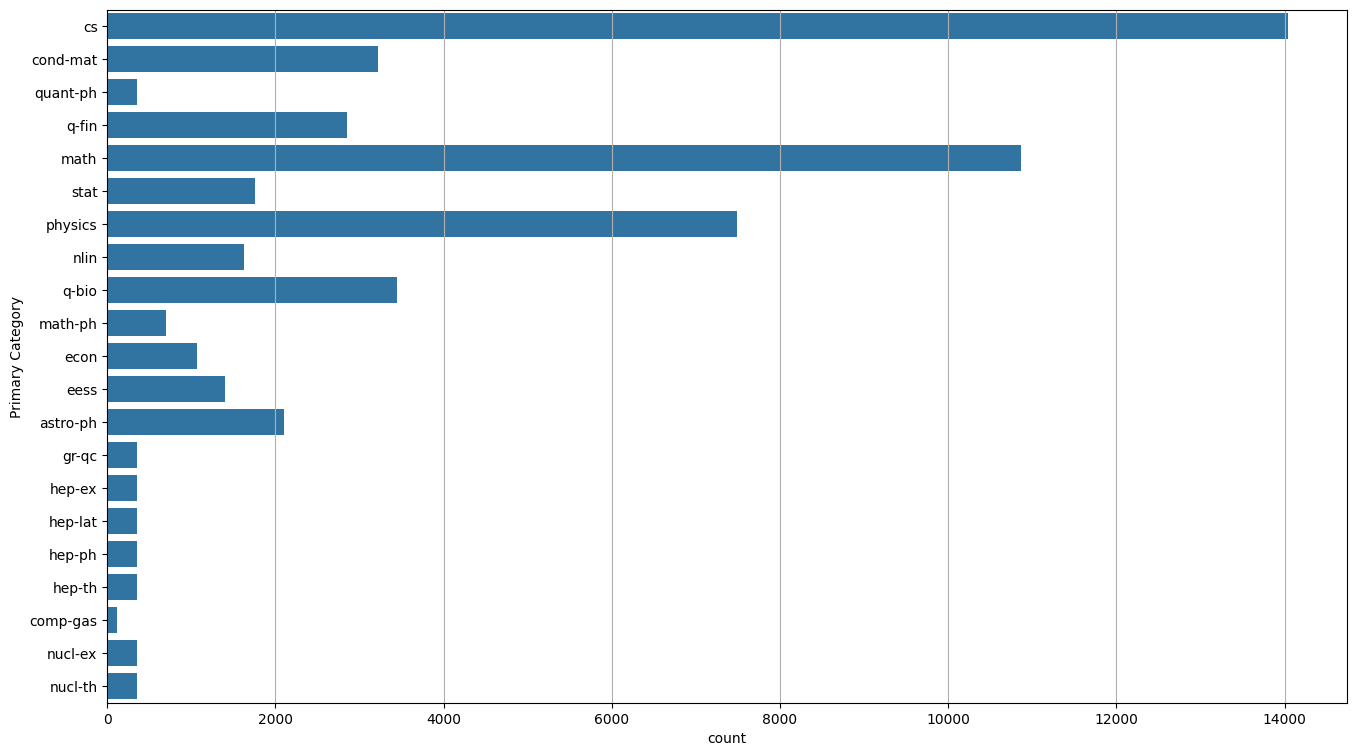

In [21]:
plt.figure(figsize=(16,9))
plt.grid()
sns.countplot(y=y)

In [22]:
y.value_counts()

Primary Category
cs          14044
math        10869
physics      7483
q-bio        3441
cond-mat     3215
q-fin        2854
astro-ph     2100
stat         1752
nlin         1629
eess         1395
econ         1072
math-ph       701
quant-ph      355
gr-qc         350
hep-ex        350
hep-lat       350
hep-ph        350
hep-th        350
nucl-ex       350
nucl-th       350
comp-gas      114
Name: count, dtype: int64

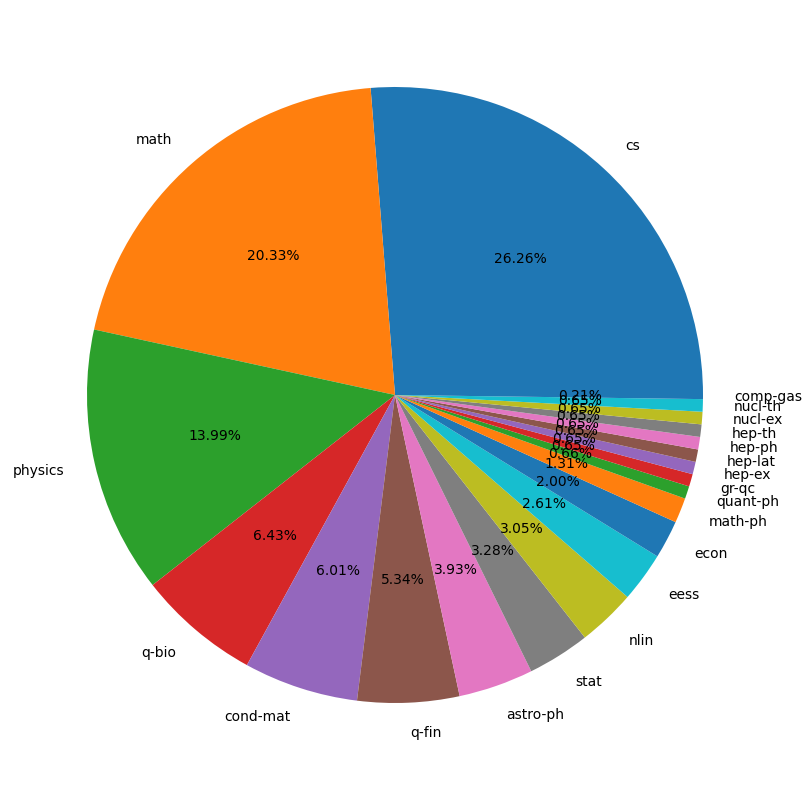

In [23]:
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

In [24]:
x[123]

'The goal of the LP+ project at the K.U.Leuven is to design an expressive logic, suitable for declarative knowledge representation, and to develop intelligent systems based on Logic Programming technology for solving computational problems using the declarative specifications. The ID-logic is an integration of typed classical logic and a definition logic. Different abductive solvers for this language are being developed. This paper is a report of the integration of high order aggregates into ID-logic and the consequences on the solver SLDNFA.'

### 4. Data Prepration and vectroization
#### Clean the data

In [25]:
import re ,string

In [26]:
def cleanData(researchText):
    researchText = re.sub('http\S+\s*', ' ',researchText) #Remove URLS
    researchText = re.sub('RT|cc', ' ',researchText) #Remove RT and cc
    researchText = re.sub('#\S+', ' ',researchText) #Remove hashtags
    researchText = re.sub('@\S+', ' ',researchText) #Remove mentions
    researchText = re.sub('[%s]'% re.escape(string.punctuation), ' ',researchText) #Remove punctuations
    researchText = re.sub(r'[^\x00-\x7f]',r' ',researchText)
    researchText = re.sub('\s+',' ',researchText) # remove extra white spaces
    return researchText

In [27]:
cleanData(x[2])

'We describe an extensive study of search in GSAT an approximation procedure for propositional satisfiability GSAT performs greedy hill climbing on the number of satisfied clauses in a truth assignment Our experiments provide a more complete picture of GSAT s search than previous a ounts We describe in detail the two phases of search rapid hill climbing followed by a long plateau search We demonstrate that when applied to randomly generated 3SAT problems there is a very simple scaling with problem size for both the mean number of satisfied clauses and the mean branching rate Our results allow us to make detailed numerical conjectures about the length of the hill climbing phase the average gradient of this phase and to conjecture that both the average score and average branching rate decay exponentially during plateau search We end by showing how these results can be used to direct future theoretical analysis This work provides a case study of how computer experiments can be used to imp

In [28]:
cleaned = x.apply(cleanData)

In [29]:
cleaned

0        Because of their o asional need to return to s...
1        Market price systems constitute a well underst...
2        We describe an extensive study of search in GS...
3        As real logic programmers normally use cut an ...
4        To support the goal of allowing users to recor...
                               ...                        
53469    We consider the problem of predicting a real r...
53470    The problem of ranking ordering instances inst...
53471    We suggest two nonparametric approaches based ...
53472    We propose nonparametric methods for functiona...
53473    Estimation of a quadratic functional over para...
Name: Summary, Length: 53474, dtype: object

#### Tf*Idf Vectorize


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfv=TfidfVectorizer(stop_words='english')

In [32]:
x_new=tfv.fit_transform(cleaned)
x_new

<53474x85996 sparse matrix of type '<class 'numpy.float64'>'
	with 2837311 stored elements in Compressed Sparse Row format>

In [33]:
tfv.get_feature_names_out()

array(['00', '000', '00000000001', ..., 'zynga', 'zynq', 'zz'],
      dtype=object)

### 5. Cross validation

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40105, 85996), (40105,), (13369, 85996), (13369,))

#### 6. Buid the model using knn with k=6

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier(n_neighbors=6)

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

#### 7. Performance Evaluation

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
y_pred=knn.predict(x_test)

In [42]:
print(accuracy_score(y_test,y_pred))

0.7173311392026329


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    astro-ph       0.82      0.85      0.83       559
    comp-gas       0.42      0.54      0.47        24
    cond-mat       0.68      0.76      0.72       753
          cs       0.70      0.88      0.78      3524
        econ       0.57      0.34      0.43       264
        eess       0.65      0.32      0.43       343
       gr-qc       0.63      0.46      0.53        99
      hep-ex       0.61      0.74      0.67        90
     hep-lat       0.66      0.56      0.60        86
      hep-ph       0.74      0.48      0.59        89
      hep-th       0.60      0.53      0.57        92
        math       0.74      0.85      0.79      2722
     math-ph       0.43      0.26      0.32       183
        nlin       0.64      0.45      0.53       420
     nucl-ex       0.63      0.58      0.60        76
     nucl-th       0.81      0.50      0.62        94
     physics       0.71      0.58      0.64      1850
       q-bio       0.78    

<Axes: >

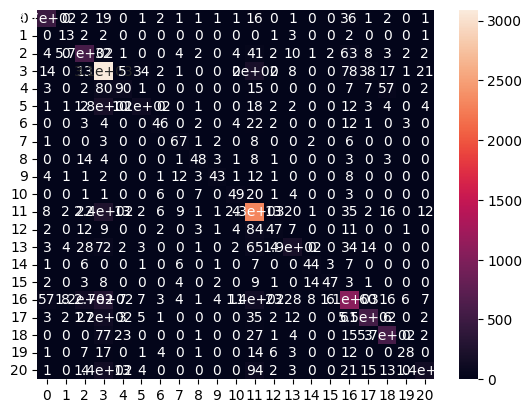

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

2. Download the file sarcasm-clusters.txt from the link below:
https://mitu.co.in/dataset
This file contains the collection unlabeled tweets where few are sarcastic and few
are not.
Perform the following operations on it:
- Read the file
- Clean, Prepare and vectorize the data
- Build the K-means clustering algorithm with 2 clusters.
- Show the tweets with 0 and 1 labels respectively.
- Find and print sarcastic and non-sarcastic tweet’s top 10 words each.

## 1. Read the file

In [4]:
df = pd.read_csv('/content/drive/MyDrive/NLP and CV/sarcasm-clusters.txt',sep='\t', header=None)
df

,0
0,It feels like just a few days ago it was the l...
1,"I love my mom . No matter what we go through ,..."
2,Bump that music ... #imtryingtosleep
3,Mexican and black jokes are pretty much the sa...
4,How to find work you love :
...,...
51184,RT My EX had one very annoying habit . Breathi...
51185,"Some days you're the Titanic , some days you'r..."
51186,"Congrats on the release of 25 @Adele , let's h..."
51187,doing my favorite thing .. crying


In [5]:
df.describe()

,0
count,51189
unique,51189
top,@TheSupremEC0URT roommate of the week really l...
freq,1


In [6]:
print(df.iloc[1,:].values[0])

I love my mom . No matter what we go through , no matter how much we argue , because I know , at the end , she'll always be there . 


## 2. Clean, Prepare and vectorize the data

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
swords=stopwords.words('english')
wnl=WordNetLemmatizer()

In [10]:
def lemmatize(word):
    tag=pos_tag([word])
    pos='n'


    if tag[0][1].startswith('N'):
        pos='n'

    elif tag[0][1].startswith('V'):
        pos='v'

    elif tag[0][1].startswith('R'):
        pos='r'

    elif tag[0][1].startswith('J'):
        pos='a'

    return wnl.lemmatize(word,pos=pos)


In [11]:
lemmatize('smaller')

'small'

In [12]:
def clean_text(sent):
    tokens1=word_tokenize(sent)
    tokens2=[token for token in tokens1 if token.isalnum()]
    token3=[token.lower() for token in tokens2 if token.lower() not in swords]
    token4=[lemmatize(token) for token in token3]
    return token4


#### Tf*Idf Vectorize

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfv=TfidfVectorizer(analyzer=clean_text)

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
x_new=tfv.fit_transform(df[0])
x_new

<51189x42846 sparse matrix of type '<class 'numpy.float64'>'
	with 421424 stored elements in Compressed Sparse Row format>

## 3.Build the K-means clustering algorithm with 2 clusters.

In [17]:
from sklearn.cluster import KMeans

In [18]:
km=KMeans(random_state=0,n_clusters=2)

In [19]:
km.fit_predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [20]:
km.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
km.inertia_

50673.20763678859

### 4. Show the tweets with 0 and 1 labels respectively.

In [24]:
labels = km.labels_
#tweets with labels 0
print("Tweets with label 0:")
for i, label in enumerate(labels):
    if label == 0:
        print(df.iloc[i][0])



Streaming output truncated to the last 5000 lines.
@DavidVitter gets career-ending Dear John letter from voters of Louisiana in governor's race today .
One of the saddest days of my life was when I heard that bears sleep for half the year and I realized I had been born the wrong species 
Should really go to bed .. Haircut at Vidal tomorrow yay :)
the idea of being attracted to ppl is so weird like it's just . Different looking face parts . they have ur face parts but just different
When your professor feels generous and gives out extra credit 😊 😊
@Blue70517 aw that's awesome ! Thank you , Cathy ! you're one of my best friends in the whole world too 😊
so happy 😊 
RT Struggling to wake up early ? Try on week off , You'll struggle to sleep . 
Sometimes I spend whole meetings wondering how they got the big meeting table through the door . 
Become a Nurse , they said it'll be fun #not #books 
RT Your sleep is inversely propotional to the battery percentage you've . 
MORNING PRAYER DEAR God 

In [25]:
#tweets with labels 1
print("\nTweets with label 1\n:")
for i, label in enumerate(labels):
    if label == 1:
        print(df.iloc[i][0])

Streaming output truncated to the last 5000 lines.
@hishaneeey sure tomorrow I will go to our mansion hehe I love you mom x
I slept all day today for no good reason 😩 this love affair with my bed takin up all my time
Just cause i dont retweet a picture doesn't mean i dont love my mom wtf 
@victaker200 Thanks for following ! Enjoy my tweets/commentary about WWE/wrestling ! You'll love my fun , enthusiastic , entertaining character !
If you watch Beauty and the Beast backwards its about how falling in love will turn you into a monster . 
you're my main nigga even tho ur white . sometimes you're an ass , but I know that's how you show your love fam . 😏 you make me want to puke
I love how my parents didn't cry today because they are happy that I graduated and want me to leave already . #feelingthelove #not 
Gotta love Mondays #not 
RIP Paul Breuninger . Love and light to his family . You'll always be our #paulprops
@MusicIsReality3 love 2 hear this 😜🎵 been struggling with my health pretty 

### 5.Find and print sarcastic and non-sarcastic tweet’s top 10 words each.

In [26]:
# Get the tweets with label 0
sarcastic_tweets = [tweet for tweet, label in zip(df[0], labels) if label == 0]

# Get the tweets with label 1
non_sarcastic_tweets = [tweet for tweet, label in zip(df[0], labels) if label == 1]

#Tokenize and count word frequencies for sarcastic tweets
sarcastic_word_counts = {}
for tweet in sarcastic_tweets:
    for word in clean_text(tweet):
        if word in sarcastic_word_counts:
            sarcastic_word_counts[word] += 1
        else:
            sarcastic_word_counts[word] = 1

#Tokenize and count word frequencies for non-sarcastic tweets
non_sarcastic_word_counts = {}
for tweet in non_sarcastic_tweets:
    for word in clean_text(tweet):
        if word in non_sarcastic_word_counts:
            non_sarcastic_word_counts[word] += 1
        else:
            non_sarcastic_word_counts[word] = 1



In [27]:
# Get the top 10 words for sarcastic tweets
top_10_sarcastic_words = sorted(sarcastic_word_counts, key=sarcastic_word_counts.get, reverse=True)[:10]
print("Top 10 words in sarcastic tweets:")
for word in top_10_sarcastic_words:
    print(word, sarcastic_word_counts[word])


Top 10 words in sarcastic tweets:
get 4625
like 3933
go 3045
day 2748
u 2204
people 2201
make 2155
great 2120
good 2068
time 1957


In [28]:

# Get the top 10 words for non-sarcastic tweets
top_10_non_sarcastic_words = sorted(non_sarcastic_word_counts, key=non_sarcastic_word_counts.get, reverse=True)[:10]
print("\nTop 10 words in non-sarcastic tweets:")
for word in top_10_non_sarcastic_words:
    print(word, non_sarcastic_word_counts[word])


Top 10 words in non-sarcastic tweets:
love 5943
get 572
much 478
u 456
like 416
day 393
go 374
people 295
make 291
work 285
